In [34]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [35]:
from utils import *
from visuals import *
from dataset import *

In [36]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [37]:
df = pd.read_csv('dataset.csv')

In [38]:
df["bboxes"] = df["bboxes"].apply(eval)

In [39]:
index = 90

In [40]:
img_path = df.filename[index]

In [41]:
bboxes = df.bboxes[index]

In [42]:
for b in bboxes:
    print(b)

[3450, 409, 3645, 603]


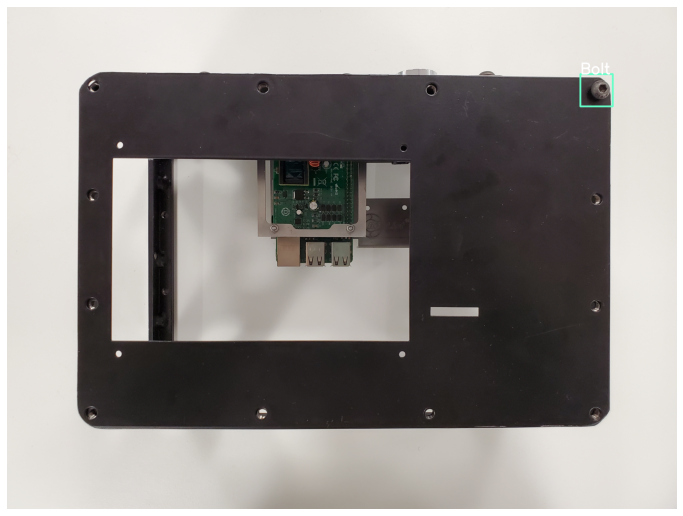

In [43]:
img = visualize_bbox_with_df(df, 90)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)
plt.show()

In [44]:
img_original = img.copy()

In [45]:
transform = A.Compose([
    #A.RandomSizedCrop(min_max_height=(1800, 2800), height=1524, width=1524, p=0.5),
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),
    A.OneOf([
        A.MotionBlur(p=.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1),
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.RandomBrightnessContrast(),            
    ], p=0.3),
    A.HueSaturationValue(p=0.3),
    A.RGBShift(),
    A.Blur(),
    A.OneOf([
        A.HueSaturationValue(hue_shift_limit=0.4, sat_shift_limit= 0.2, 
                             val_shift_limit=0.2, p=0.9),
        A.RandomBrightnessContrast(brightness_limit=0.2, 
                                   contrast_limit=0.5, p=0.9),
    ],p=0.9),
    A.ToGray(p=0.01),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Cutout(num_holes=8, max_h_size=164, max_w_size=164, fill_value=0, p=0.5),
    ToTensorV2(),
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_labels']))

/opt/conda/lib/python3.9/site-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [46]:
index = 90

In [47]:
img = cv2.imread(df.filename[index])
img = img.transpose(1,0,2)
img = np.flipud(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

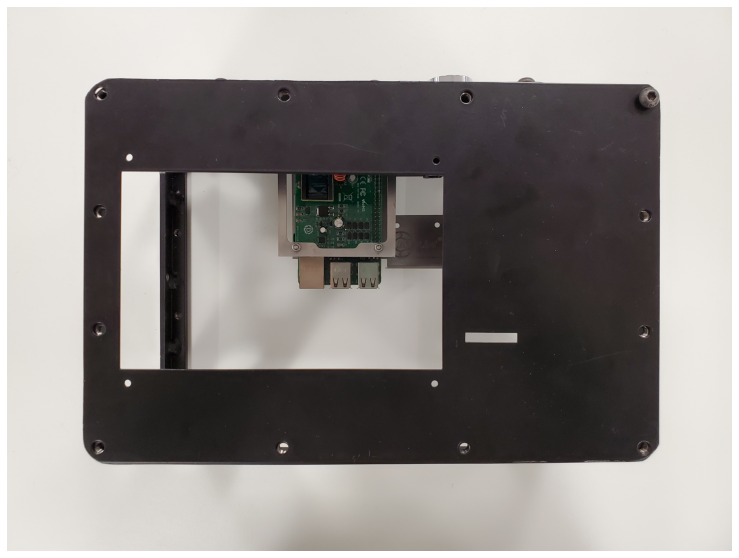

In [48]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [49]:
transformed = transform(image=img, bboxes=bboxes, class_labels=['Bolt']*len(bboxes))
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['class_labels']

In [50]:
img_aug = transformed['image']

In [51]:
transformed['bboxes']

[(3307.1075143780386, 0.0, 3584.1083436743256, 109.15122579512865)]

In [52]:
img = visualize_bbox(img_aug.cpu().permute(1,2,0).numpy(), transformed['bboxes'])

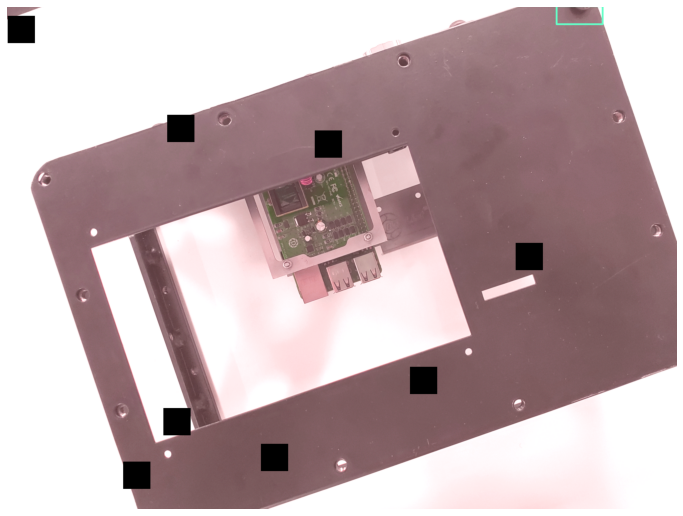

In [53]:
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img)
plt.show()

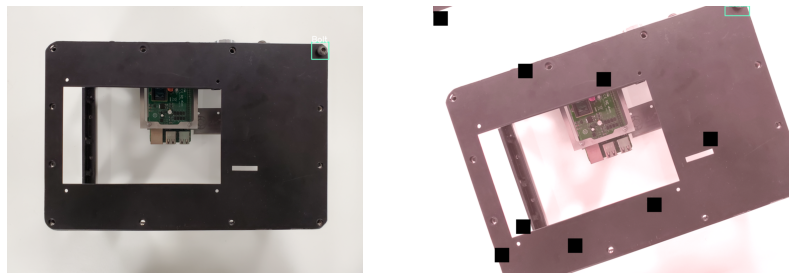

In [54]:
plt.subplot(1,2,1)
plt.imshow(img_original)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img)
plt.axis('off')
plt.show()

In [55]:
df = pd.read_csv('dataset_strat.csv')

In [56]:
df["bboxes"] = df["bboxes"].apply(eval)

In [57]:
transform = A.Compose([
    #A.RandomSizedCrop(min_max_height=(1800, 2800), height=1524, width=1524, p=0.5),
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),
    A.OneOf([
        A.MotionBlur(p=.2),
        A.MedianBlur(blur_limit=3, p=0.1),
        A.Blur(blur_limit=3, p=0.1),
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
    A.OneOf([
        A.CLAHE(clip_limit=2),
        A.RandomBrightnessContrast(),            
    ], p=0.3),
    A.HueSaturationValue(p=0.3),
    A.RGBShift(),
    A.Blur(),
    A.OneOf([
        A.HueSaturationValue(hue_shift_limit=0.4, sat_shift_limit= 0.2, 
                             val_shift_limit=0.2, p=0.9),
        A.RandomBrightnessContrast(brightness_limit=0.2, 
                                   contrast_limit=0.5, p=0.9),
    ],p=0.9),
    A.ToGray(p=0.01),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    #A.Resize(height=1024, width=1024, p=1),
    A.Cutout(num_holes=8, max_h_size=164, max_w_size=164, fill_value=0, p=0.5),
    #A.Normalize(),
    #ToTensorV2(),
], bbox_params=A.BboxParams(format="pascal_voc", min_area=0, min_visibility=0, label_fields=['labels']))

/opt/conda/lib/python3.9/site-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [58]:
dataset = BoltDataset(df, transform, 'train')

In [59]:
df_new_photos = dataset.df[dataset.df['width']!=4032]

In [60]:
df_new_photos = df_new_photos.reset_index(drop=True)

In [61]:
# for i in range(len(df_new_photos)):
#     img = visualize_bbox_with_df(df_new_photos, i)
#     plt.imshow(img)
df.filename[4]

'/home/jovyan/work/COREF/src/Bolt_Detection/Training_Data/images/2021-11-19_3_bolts_0011.jpg'

In [62]:
img = visualize_bbox_with_df(df, 6)

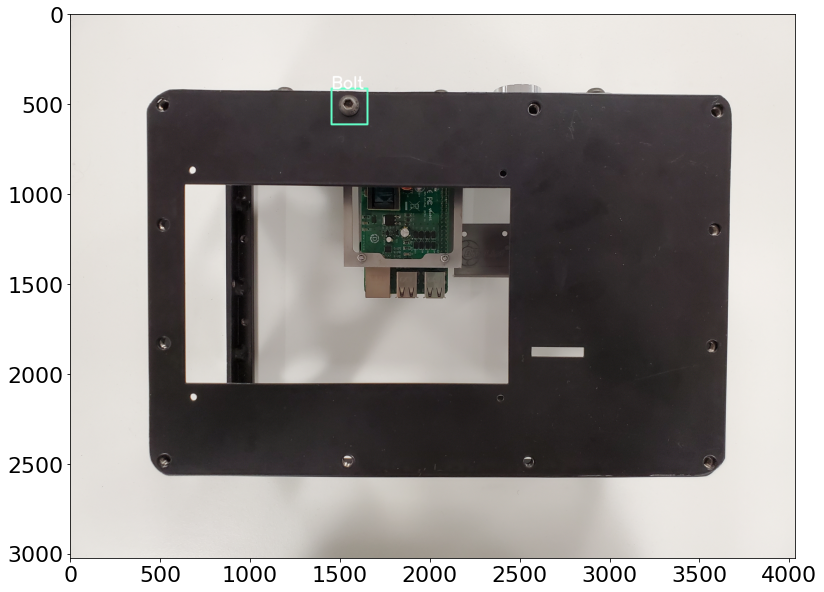

In [63]:
plt.imshow(img)

In [64]:
img, _, _ = dataset[13]

In [65]:
img.shape[1]

4032

In [66]:
img.shape[0]

3024

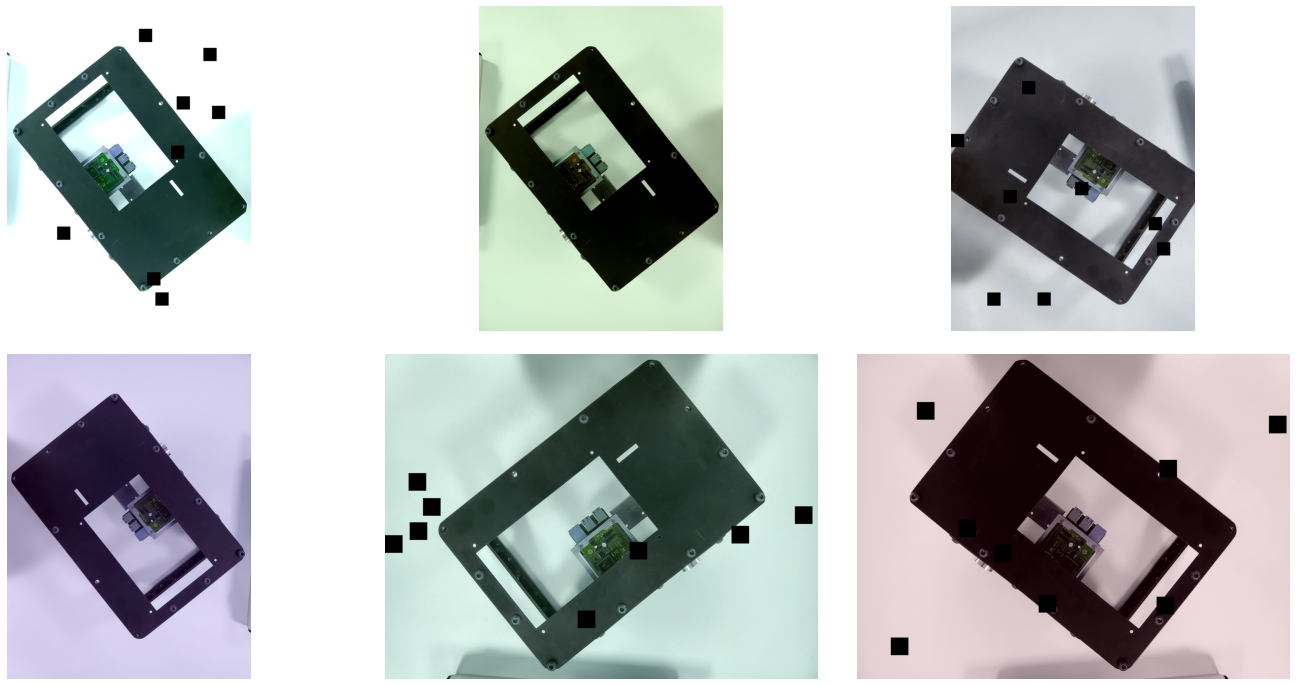

In [67]:
#random.seed(50)
visualize_augmentations(dataset, idx=13)